In [1]:
# Importing all necessary packages

#Linear Algebra
import numpy as np

#Data Processing
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#ML Algorithms
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier


#Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the 'Titanic' Dataset of the dataset
rms_titanic = pd.read_csv("C:train.csv")

In [3]:
#Display the head values
rms_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Display the tail values of the dataset
rms_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#Basic information about the imported dataset
rms_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
#Providing a statistical dwscription of the imported database
rms_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Phase_1 : EDA or Exploratory Data Analysis

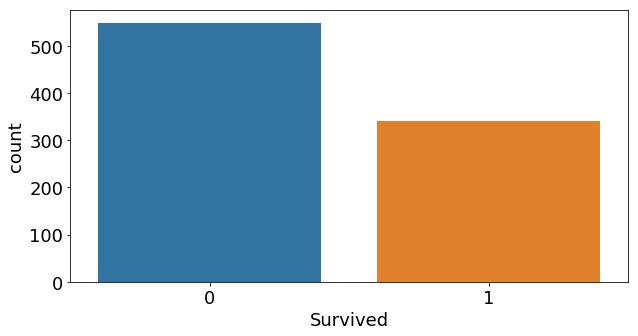

In [7]:
#Count plot of people who survived the disaster and of the ones who didn't
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(10,5))

sns.countplot(data = rms_titanic,
             x = rms_titanic["Survived"])

plt.show()

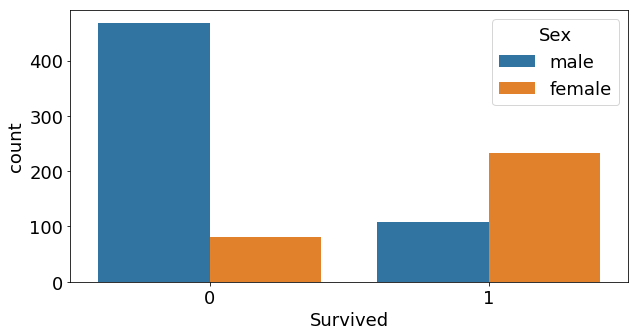

In [8]:
#Count plot of survived versus dead based on gender
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(10,5))

sns.countplot(data = rms_titanic,
             x = rms_titanic["Survived"],
             hue="Sex")

plt.show()

This indicates that there was a 'women and children first' policy on the Titanic.

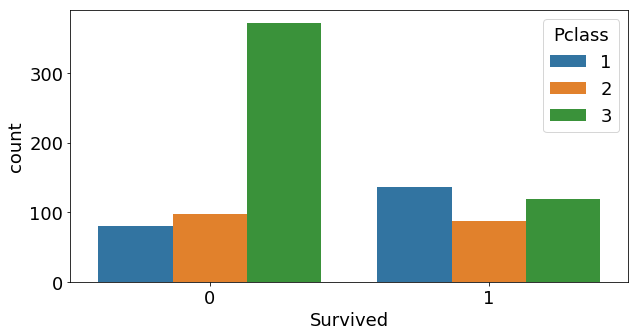

In [378]:
#Count plot of survived versus dead based on class
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(10,5))

sns.countplot(data = rms_titanic,
             x = rms_titanic["Survived"],
             hue="Pclass")

plt.show()

Passengers travelling in the First class had a higher survival rate than others.

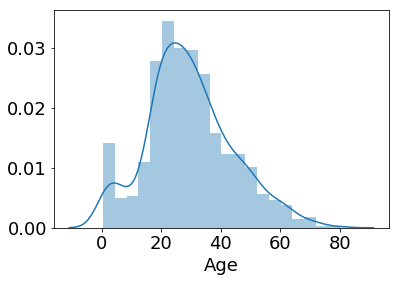

In [379]:
#Lets get some overview of the various age groups on board
sns.distplot(rms_titanic["Age"].dropna())

plt.show()

In [380]:
print("The mean age of passengers onboard the RMS Titanic = "+str(round(rms_titanic["Age"].mean()))+" years")

The mean age of passengers onboard the RMS Titanic = 30 years


# Phase_2 : Data Cleaning

Here we make use of the 'seaborn' library to create a heatmap, that shows exactly where we have missing data

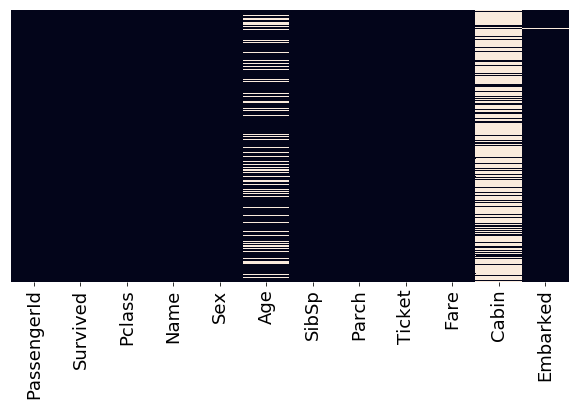

In [381]:
plt.figure(figsize=(10,5))

sns.heatmap(data = rms_titanic.isnull(),  #------> To display only the null or missing values
           yticklabels = False,           #------> Hide labels on Y-Axis
           cbar = False)                  #------> Hide the color bar on the right

plt.show()

Observations:

Missing data observed in columns : 'Age', 'Cabin','Embarked'

Step 1 : Filling the missing entities in "Age" column

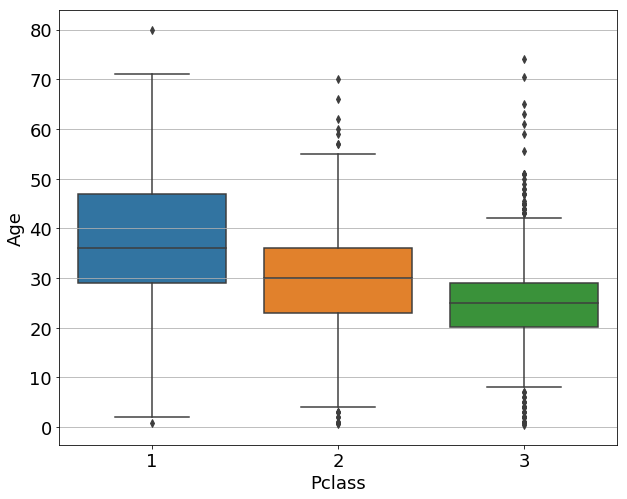

In [403]:
plt.figure(figsize=(10,8))
plt.grid()
sns.boxplot(data = rms_titanic,
           x = rms_titanic["Pclass"],
           y = rms_titanic["Age"])
plt.show()

Observations:
People in the higher classes have an overall high mean age

In [383]:
def fill_age(c):
    Age = c[0]
    Pclass = c[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 36
        elif Pclass==2:
            return 30
        else:
            return 25
    else:
        return Age

rms_titanic["Age"] = rms_titanic[["Age","Pclass"]].apply(fill_age,axis=1)

In [384]:
rms_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [385]:
def cabin_fill(arg):
    Cabin = arg[0]
    if type(Cabin)==str:
        return 1
    else:
        return 0

rms_titanic["Cabin"] = rms_titanic[["Cabin"]].apply(cabin_fill,axis=1)

In [386]:
rms_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,1,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C


In [387]:
rms_titanic.dropna(inplace=True)

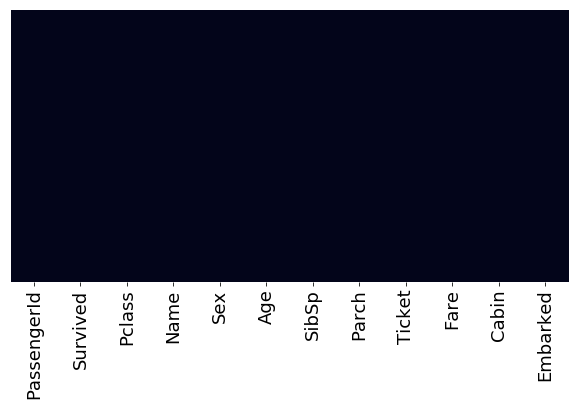

In [388]:
plt.figure(figsize=(10,5))

sns.heatmap(data=rms_titanic.isnull(),
           yticklabels=False,
           cbar=False)
plt.show()

# Phase_3 : Machine Learning

# Step_1 : Converting categorical features into dummy variables 
# using 'Pandas'

In [389]:
copy_of_rms_titanic = rms_titanic

In [390]:
sex = pd.get_dummies(data = copy_of_rms_titanic["Sex"],
                     drop_first=True)

embark = pd.get_dummies(data = copy_of_rms_titanic["Embarked"],
                       drop_first=True)

In [391]:
copy_of_rms_titanic.drop(["Name","Sex","Ticket","Embarked"],
                                              axis = 1,
                                              inplace=True)

In [392]:
copy_of_rms_titanic = pd.concat([copy_of_rms_titanic,sex,embark], axis = 1)

In [393]:
copy_of_rms_titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,1


# Step 2 : Preparing data for "Training" and "Testing"

In [394]:
xtrain,xtest,ytrain,ytest = train_test_split(copy_of_rms_titanic.drop("Survived",axis=1),  #-----> 'x' or independant parameter
                                            copy_of_rms_titanic["Survived"],               #-----> 'y' or dependant parameter
                                             test_size = 0.30)                              #        (to be determined)

# Testing using 'Logistical Regression Model'

In [395]:
regressor_1 = LogisticRegression()

regressor_1.fit(xtrain, ytrain)

pred = regressor_1.predict(xtest)

confusmat_1 = confusion_matrix(ytest, pred)
class_rep_1 = classification_report(ytest, pred)
accuracy = accuracy_score(ytest, pred)


print("Confustion Matrix : ")
print(confusmat_1)
print("\n")
print("Classification report : ")
print(class_rep_1)
print("\n")
print("Accuracy = "+str(accuracy*100)+" %")

Confustion Matrix : 
[[142  23]
 [ 31  71]]


Classification report : 
             precision    recall  f1-score   support

          0       0.82      0.86      0.84       165
          1       0.76      0.70      0.72       102

avg / total       0.80      0.80      0.80       267



Accuracy = 79.7752808988764 %


# Testing using 'Support Vector Machines'

In [399]:
regressor_2 = SVC()

regressor_2.fit(xtrain, ytrain)

pred_2 = regressor_2.predict(xtest)

accuracy_2 = accuracy_score(ytest, pred_2)
confusmat_2 = confusion_matrix(ytest, pred_2)
class_rep_2 = classification_report(ytest, pred_2)

print("Confustion Matrix : ")
print(confusmat_2)
print("\n")
print("Classification report : ")
print(class_rep_2)
print("\n")
print("Accuracy = "+str(accuracy_2*100)+" %")

Confustion Matrix : 
[[160   5]
 [101   1]]


Classification report : 
             precision    recall  f1-score   support

          0       0.61      0.97      0.75       165
          1       0.17      0.01      0.02       102

avg / total       0.44      0.60      0.47       267



Accuracy = 60.2996254681648 %


# Testing using 'K Nearest Neighbors'

In [400]:
regressor_3 = KNeighborsClassifier()

regressor_3.fit(xtrain,ytrain)

pred_3 = regressor_3.predict(xtest)

confusmat_3 = confusion_matrix(ytest, pred_3)
class_rep_3 = classification_report(ytest, pred_3)
accuracy_3 = accuracy_score(ytest, pred_3)

print("Confustion Matrix : ")
print(confusmat_3)
print("\n")
print("Classification report : ")
print(class_rep_3)
print("\n")
print("Accuracy = "+str(accuracy_3*100)+" %")

Confustion Matrix : 
[[127  38]
 [ 62  40]]


Classification report : 
             precision    recall  f1-score   support

          0       0.67      0.77      0.72       165
          1       0.51      0.39      0.44       102

avg / total       0.61      0.63      0.61       267



Accuracy = 62.546816479400746 %


# Testing using 'AdaBoost Classifier'

In [401]:
regressor_4 = AdaBoostClassifier()

regressor_4.fit(xtrain, ytrain)

pred_4 = regressor_4.predict(xtest)

confusmat_4 = confusion_matrix(ytest,pred_4)
class_rep_4 = classification_report(ytest,pred_4)
accuracy_4 = accuracy_score(ytest,pred_4)

print("Confustion Matrix : ")
print(confusmat_4)
print("\n")
print("Classification report : ")
print(class_rep_4)
print("\n")
print("Accuracy = "+str(accuracy_4*100)+" %")

Confustion Matrix : 
[[138  27]
 [ 26  76]]


Classification report : 
             precision    recall  f1-score   support

          0       0.84      0.84      0.84       165
          1       0.74      0.75      0.74       102

avg / total       0.80      0.80      0.80       267



Accuracy = 80.14981273408239 %
